
<a id = Section3></a>
# 1. Installing & Importing Libraries

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

---
<a name = Section4></a>
# **2. Data Acquisition & Description**
---

In [2]:
drug=pd.read_csv('C:\\Users\\HP\\Desktop\\Insaid\\Machine Learning Supervised\\Project 3\\drug_train.csv')
drug.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


### **Data Information**

In [3]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.3+ KB


### **Data Description**

In [4]:
drug.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


---
<a name = Section5></a>
# **3. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [5]:
#output_report=ProfileReport(drug)
#output_report.to_file('pre_drug.html')

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 7
- Number of observations: 160
- Missing cells: 0
- Duplicate rows: 0

__Variables types__: 
- Numeric = 3
- Categorical = 4

- **ID** is a unique variable
- This is an imbalanced dataset


- Since **ID** is a unique variable hence deleting it

In [6]:
drug.drop('Id',axis=1,inplace=True)

In [7]:
drug['Drug'].value_counts()

DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64

- As the number of appearance of DrugC, DrugA, DrugB are really low hence this is an imbalanced dataset.

- Converting categorical varibales into numerical varibles

In [8]:
data=pd.get_dummies(data=drug,columns=['Sex','BP','Cholesterol'],drop_first=True)

In [9]:
data.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,32,10.840,drugX,0,1,0,1
1,52,9.894,drugX,1,0,1,0
2,39,9.709,drugX,0,0,1,1
3,33,33.486,DrugY,0,1,0,0
4,34,22.456,DrugY,1,0,1,0


In [10]:
data=data.loc[:, ["Age","Na_to_K","Sex_M","BP_LOW","BP_NORMAL","Cholesterol_NORMAL","Drug"]]

In [11]:
data.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,32,10.840,0,1,0,1,drugX
1,52,9.894,1,0,1,0,drugX
2,39,9.709,0,0,1,1,drugX
3,33,33.486,0,1,0,0,DrugY
4,34,22.456,1,0,1,0,DrugY


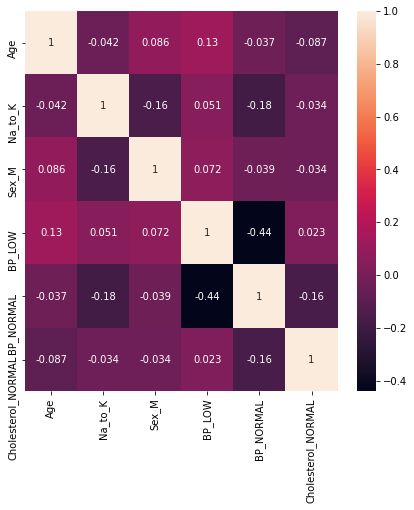

In [12]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

- No two variables are highly correlated

# 4. Building Model

In [13]:
def new_target(i):
    if i == 'drugX':
        return 0
    elif i =='DrugY':
        return 1
    elif i =='drugC':
        return 2
    elif i =='drugA':
        return 3
    elif i =='drugB':
        return 4

In [14]:
data['Drug']=data['Drug'].apply(new_target)

In [16]:
data.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug
0,32,10.840,0,1,0,1,0
1,52,9.894,1,0,1,0,0
2,39,9.709,0,0,1,1,0
3,33,33.486,0,1,0,0,1
4,34,22.456,1,0,1,0,1


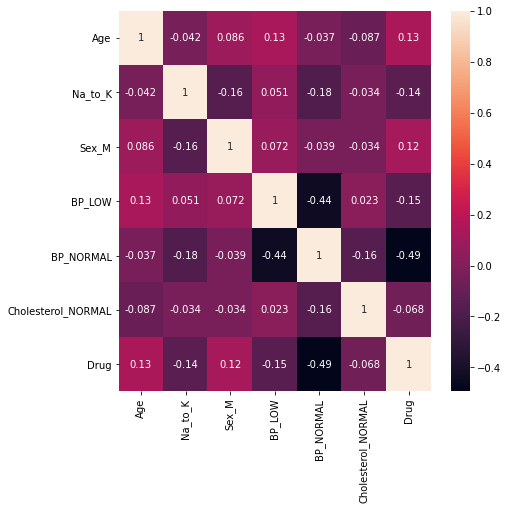

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
x=data[['Age','Na_to_K','Sex_M','BP_LOW','BP_NORMAL','Cholesterol_NORMAL']]
y=data['Drug']

In [18]:
X=x.to_numpy()

In [19]:
Y=y.to_numpy()

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [21]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
scores=cross_val_score(DecisionTreeClassifier(),X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
score=np.mean(scores)

In [22]:
score

0.9875

In [23]:
oversample=SMOTE()
X_new,Y_new=oversample.fit_resample(X,Y)

In [24]:
x_final= pd.DataFrame(X_new, columns=['Age','Na_to_K','Sex_M','BP_LOW','BP_NORMAL','Cholesterol_NORMAL']) 
y_final=pd.DataFrame(Y_new,columns=['Drug'])

In [25]:
y_final['Drug'].value_counts()

4    76
3    76
2    76
1    76
0    76
Name: Drug, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(x_final,y_final,test_size=0.2)

In [29]:
estimators=[('Naive Bayes',GaussianNB()),
            ('KNN',KNeighborsClassifier()),
            ('Random Forest',RandomForestClassifier())]

In [30]:
stack_clf=StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(),cv=5)
stack_clf.fit(X_train,Y_train)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


StackingClassifier(cv=5,
                   estimators=[('Naive Bayes', GaussianNB()),
                               ('KNN', KNeighborsClassifier()),
                               ('Random Forest', RandomForestClassifier())],
                   final_estimator=GradientBoostingClassifier())

In [31]:
y_pred_test=stack_clf.predict(X_test)

In [32]:
y_pred_train=stack_clf.predict(X_train)

In [33]:
print("Precision Score : ",precision_score(Y_test, y_pred_test, 
                                           
                                           average='micro'))
print("Recall Score : ",recall_score(Y_test, y_pred_test, 
                                           
                                           average='micro'))
print("F1 Score : ",f1_score(Y_test, y_pred_test, 
                             
                             average='micro'))
print("Accuracy Score : ",accuracy_score(Y_test, y_pred_test))


Precision Score :  1.0
Recall Score :  1.0
F1 Score :  1.0
Accuracy Score :  1.0


In [34]:
print("Precision Score : ",precision_score(Y_train, y_pred_train, 
                                           
                                           average='micro'))
print("Recall Score : ",recall_score(Y_train, y_pred_train, 
                                           
                                           average='micro'))
print("F1 Score : ",f1_score(Y_train, y_pred_train, 
                             
                             average='micro'))
print("Accuracy Score : ",accuracy_score(Y_train, y_pred_train))

Precision Score :  1.0
Recall Score :  1.0
F1 Score :  1.0
Accuracy Score :  1.0


# 5. Importing Test Data

In [35]:
test_data=pd.read_csv('C:\\Users\\HP\\Desktop\\Insaid\\Machine Learning Supervised\\Project 3\\drug_test.csv')
test_data.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542


In [36]:
test_data.drop('Id',axis=1,inplace=True)

In [37]:
final=pd.get_dummies(data=test_data,columns=['Sex','BP','Cholesterol'],drop_first=True)

In [38]:
final.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,36,11.424,1,1,0,1
1,16,15.516,0,0,0,1
2,18,8.750,0,0,1,1
3,59,10.444,0,1,0,0
4,47,33.542,1,1,0,1


In [39]:
submit=stack_clf.predict(final)

In [40]:
submit_df=pd.DataFrame(submit,columns=['Drug'])

In [41]:
submit_df

,Drug
0,0
1,1
2,0
3,2
4,1
5,1
6,1
7,0
8,3
9,0


In [43]:
submit_df.to_csv("drug_prediction.csv",index=False)